# Assignment 1

**Title:** Learn Probability Density Functions using Roll-Number-Parameterized Non-Linear Model  
**Dataset:** India Air Quality Data (Consider **NO2** as feature $x$)  

**Source:** [Kaggle Dataset Link](https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# load data
df = pd.read_csv("data.csv", encoding="cp1252")
df.head()

C:\Users\vansh\AppData\Local\Temp\ipykernel_7932\423034469.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


**Step-1:** Transform each value of $x$ into $z$ using the transformation function given below:

$$z = T_r(x) = x + a_r \sin(b_r x) \tag{1}$$

Where:
* $a_r = 0.05 \times (r \bmod 7)$
* $b_r = 0.3 \times ((r \bmod 5) + 1)$
* $r$ is your **UNIVERSITY ROLL NUMBER**.

In [4]:
# Only No2
x = pd.to_numeric(df['no2'], errors='coerce').dropna()
x = x[x >= 0].values
print(f"Data Loaded: {len(x)} samples")


Data Loaded: 419509 samples


In [5]:
# roll number
r = 102483084

# Transformation
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)
z = x + ar * np.sin(br * x)
print(z)


[17.5646666   6.82406085 28.31134918 ... 44.8001957  49.92244367
 45.97704304]


**Step-2:** Learn parameters of the following probability density function using any estimation technique or by using any machine learning technique.

$$
\hat{p}(z) = c * e^{-\lambda(z-\mu)^2} \tag{2}
$$

Where, $\hat{p}(z)$ is the predicted probability of the transformed variable $z$. In this step, you have to learn parameters $\lambda, \mu \text{ and } c$ in Eq.(2).

In [15]:
# Estimate Parameters (Analytical MLE)
# For a Gaussian form p(z) ~ exp(-lambda(z-mu)^2):
# mu is the Mean
# lambda is 1 / (2 * Variance)
# c is the normalization constant

mu_hat = np.mean(z) 
var_z = np.var(z)

lambda_hat = 1.0 / (2.0 * var_z)
c_hat = 1.0 / np.sqrt(2.0 * np.pi * var_z)

# Print vals
print("Final Estimated Parameters:")
print(f"Mean (μ)     : {mu_hat:.6f}")
print(f"Lambda (λ)   : {lambda_hat:.6f}")
print(f"Constant (c) : {c_hat:.6f}")

# save result
results_path = os.path.join("outputs", "results.txt")
with open(results_path, "w") as f:
    f.write(f" Assignment 1 Results\n")
    f.write(f" Roll Number: {102483084}\n")
    f.write("="*30 + "\n")
    f.write(f"Mean (mu)     : {mu_hat:.6f}\n")
    f.write(f"Lambda (lam)  : {lambda_hat:.6f}\n")
    f.write(f"Constant (c)  : {c_hat:.6f}\n")
    f.write("="*30 + "\n")

Final Estimated Parameters:
Mean (μ)     : 25.816375
Lambda (λ)   : 0.001461
Constant (c) : 0.021569


#### Verification

 Plot saved to: outputs\fit_plot.png


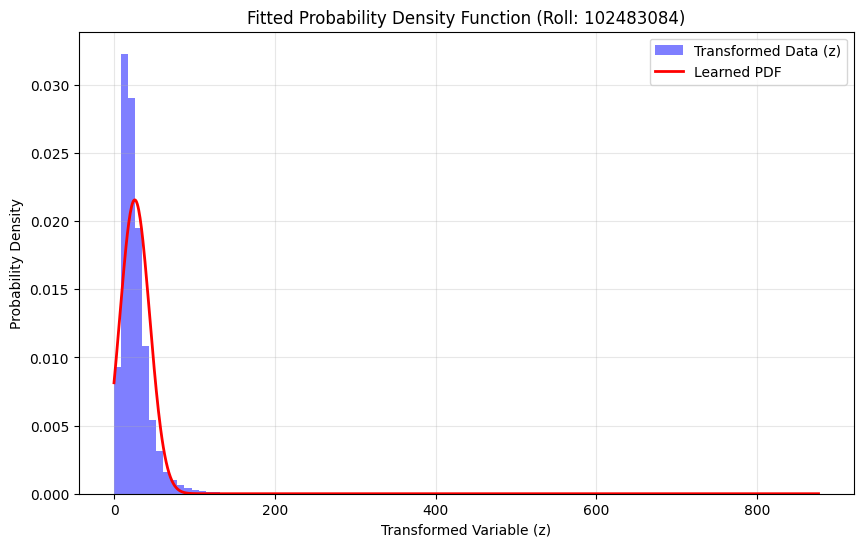

In [17]:
plt.figure(figsize=(10, 6))

# Plot Histogram of Data
plt.hist(z, bins=100, density=True, alpha=0.5, label="Transformed Data (z)", color='blue')

# Plot the Learned Curve
z_grid = np.linspace(z.min(), z.max(), 1000)
pdf_curve = c_hat * np.exp(-lambda_hat * (z_grid - mu_hat)**2)

plt.plot(z_grid, pdf_curve, color='red', linewidth=2, label=f"Learned PDF")
plt.title(f"Fitted Probability Density Function (Roll: {r})")
plt.xlabel("Transformed Variable (z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)

# Save Plot
plot_path = os.path.join("outputs", "fit_plot.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f" Plot saved to: {plot_path}")

plt.show()